<h1 style="background-color: #3498db; color: #fff; padding: 10px; border-radius: 8px; border: 2px solid #2980b9; text-align: center;">Convolutional Neural Network (CNN)</h1>



<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h2 style="color: #3498db;">You will Learn the following</h2>
    <ol style="list-style-type: none; padding: 0; font-size:20px;">
        <li style="margin-bottom: 10px; padding-left: 20px; position: relative;">
            <span style="background-color: #3498db; color: #fff; border-radius: 50%; padding: 5px; position: absolute; left: -20px; top: 4px;">1</span>
            Loading dataset
        </li>
        <li style="margin-bottom: 10px; padding-left: 20px; position: relative;">
            <span style="background-color: #3498db; color: #fff; border-radius: 50%; padding: 5px; position: absolute; left: -20px; top: 4px;">2</span>
            Preprocessing the dataset
        </li>
        <li style="margin-bottom: 10px; padding-left: 20px; position: relative;">
            <span style="background-color: #3498db; color: #fff; border-radius: 50%; padding: 5px; position: absolute; left: -20px; top: 4px;">3</span>
            Structure of Convolutional Neural Network
        </li>
        <li style="margin-bottom: 10px; padding-left: 20px; position: relative;">
            <span style="background-color: #3498db; color: #fff; border-radius: 50%; padding: 5px; position: absolute; left: -20px; top: 4px;">4</span>
            Training a Convolutional Neural Network
        </li>
        <li style="padding-left: 20px; position: relative;">
            <span style="background-color: #3498db; color: #fff; border-radius: 50%; padding: 5px; position: absolute; left: -20px; top: 4px;">5</span>
            Testing a Convolutional Neural Network
        </li>
    </ol>
</div>


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">Introduction to Convolutional Networks</h2>
    <p style = "font-size: 20px"> A convolutional neural network is a feed-forward neural network that is generally used to analyze visual images by processing data with grid-like topology. It’s also known as a ConvNet. A convolutional neural network is used to detect and classify objects in an image.</p>
    
   <p style = "font-size: 20px">In the world of computer vision, the most basic and common image recognition algorithm is the convolutional network. With the popularity of frameworks such as TensorFlow and PyTorch, it has become easier to use convolutional networks, allowing us to focus on the forward pass instead of implementing the backward pass.</p>
    <p style = "font-size: 20px">This notebook assumes that we are all familiar with convolutional networks, so we won’t go into much detail here. Instead, I’ll just use a few GIFs to refresh your memory on the implementation of convolutional networks as we know them.</p>
</div>


<h2 style="color: #007bff;border-bottom: 2px solid">Digit Classification using Convolutional Neural Networks</h2>


<img src="https://i0.wp.com/miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png" alt="Another image">


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px; border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">1. Loading Required Packages and Dataset</h2>
    <p style = "font-size: 20px">Before diving into the implementation, let's start by loading the necessary packages and the dataset. This step is crucial for setting up the environment and preparing the data for our convolutional network.</p>
    <p style = "font-size: 20px">Below, we'll demonstrate the code to load the required packages and fetch the dataset using popular libraries like TensorFlow.</p>
</div>


In [12]:
# Import required Packages
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [13]:
# Checking Available Devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7175795634265292176
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14244440542709068578
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">2. Loading and Data Splitting</h2>
    <p style = "font-size: 20px">Now that we've loaded the necessary packages and dataset, the next step is to split the data into training, validation, and testing sets. Proper data splitting is crucial for training and evaluating the performance of our convolutional network.</p>
   
</div>


In [14]:
# Loading Dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*x-WnTMjEZKngoyxeyI8Wvg.png" alt="Another image">


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px; border-top: 2px solid #007bff">
    <h2 style="color: #007bff; border-bottom: 2px solid">3. Displaying Sample Images</h2>
    <p style="font-size: 20px">In this section, we visualize a subset of the test dataset by displaying the first 'n' images. This provides a glimpse into the data that the model will be working with.</p>


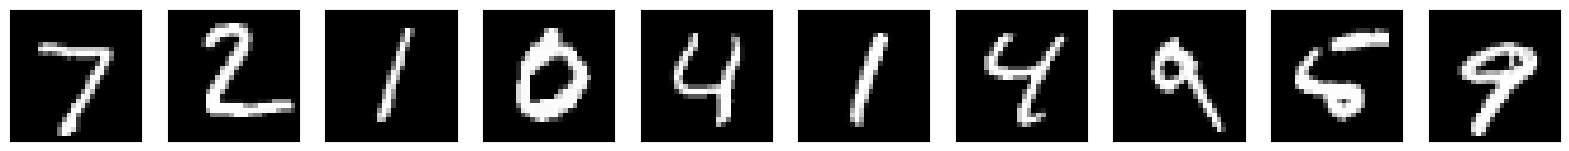

In [15]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(x_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">4. Displaying the Shapes of the Dataset</h2>
    <p style = "font-size: 20px">Now, let's take a quick look at the shapes of the dataset to get a better understanding of its structure. Examining the dimensions of the data is essential for configuring the input layer of our convolutional network.</p>
    <p style = "font-size: 20px">We'll explore the number of samples, features, and labels available in the training, validation, and testing sets.</p>
</div>


In [16]:
#Dataset Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
x_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">5. Reshaping the Data</h2>
    <p style = "font-size: 20px">In this step, we reshape the data to ensure it is in the appropriate format for consumption by the TensorFlow backend. Reshaping is crucial to match the expected input shape of our convolutional network.</p>
    <p style = "font-size: 20px">For the TensorFlow backend, the common format is "Channel Last," where the data is reshaped to have dimensions [number of samples, height, width, channels]. In this case, we reshape the input data to have a single channel.</p>
    
</div>


In [17]:
# Reshaping Data in "Channel Last" format for consumption of Tensorflow backend
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">6. Min Max Scaling</h2>
    <p style = "font-size: 20px">After reshaping the data, the next step is to perform Min-Max scaling. This involves converting the pixel values to floating point format and normalizing them to a range between 0 and 1. Scaling the data helps in improving the training stability and convergence of our convolutional network.</p>
</div>


In [18]:
# converting to floating point and normalizing pixel values in range [0,1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

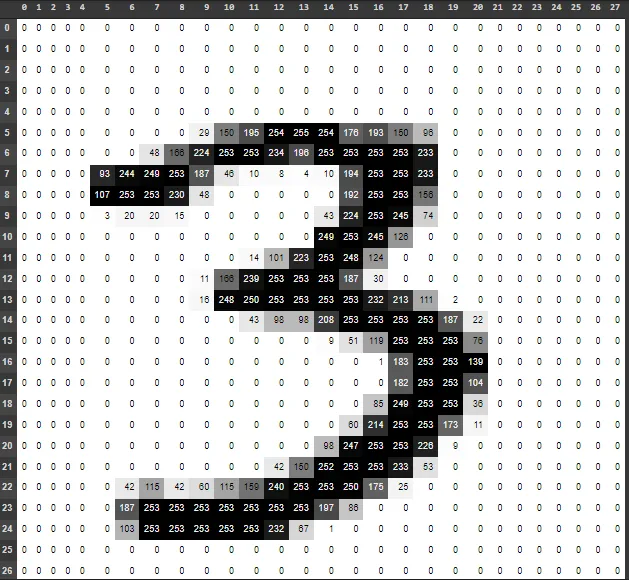

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">7. One-Hot Encoding</h2>
    <p style = "font-size: 20px">Now, we perform One-Hot encoding on the labels for multi-class classification. This step is crucial for converting categorical labels into a binary matrix format, making it suitable for training a neural network.</p>
    <p style = "font-size: 20px">We utilize libraries like Keras to_categorical to perform this encoding, transforming the labels into a binary matrix representation.</p>
</div>


In [19]:
# Reshaping Labels in One-hot encoding for Multi-class Classification
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Seeing updated Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000, 10)
x_test Shape : (10000, 28, 28, 1)
y_test Shape : (10000, 10)


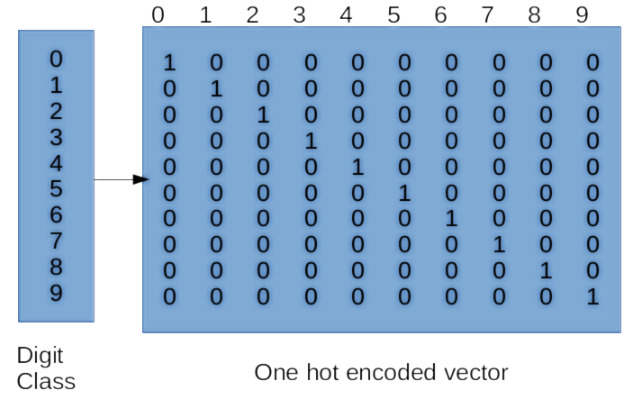

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">8. Building the CNN</h2>
    <p style = "font-size: 20px">We are now ready to construct the Convolutional Neural Network (CNN) architecture. The CNN will consist of convolutional layers, max-pooling layers, and fully connected layers. These components work together to learn hierarchical features from the input data and make predictions.</p>
    <p style = "font-size: 20px">The model is defined using the Keras Sequential API, and the architecture includes convolutional layers with varying numbers of filters, max-pooling layers for down-sampling, and dense layers for classification. The final model is compiled with a categorical cross-entropy loss function and the SGD optimizer.</p>
</div>


In [22]:
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [23]:

# img_rows, img_cols, channels = 28, 28, 1 # 1 for greyscale images and 3 for rgb images

# classes=10
# Define the dimensions of the input image
img_rows, img_cols, channels = 28, 28, 1  # 1 for greyscale images and 3 for rgb images

# Define the number of filters for each layer of the CNN
filters = [6, 32, 80 ,120]  # These are the number of filters in each layer of the CNN

# Define the number of classes for classification
classes = 10  # This is the number of different categories that the CNN will classify images into


In [24]:
# Creating Model

model=Sequential() #Sequential is a container to store layers
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) #For reducing image size
# (dim+pad-kernel)/2   (28 +3 -3)/2 = 14
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (14 +2 -2)/2 = 7
model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7 +2 -2)/2 = 3
model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3 +2 -2)/2 = 1
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">

<h3 style="color: #007bff;">Pooling layer</h3>
</div>

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*7ZLLprpbQjPFW3R2b97z0Q.gif" alt="Animated image">


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 80)          0

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;  border-top: 2px solid #007bff;">
    <h2 style="color: #007bff; border-bottom: 2px solid">9. Parameters Calculations in CNN</h2>
    <p style = "font-size: 20px">The number of parameters in a convolutional layer is calculated using the formula:</p>
    <p style = "font-size: 20px"><strong>(filter_height * filter_width * input_channels + 1) * number_of_filters</strong></p>
    <p style = "font-size: 20px"><strong>Layer 1:</strong> (3 x 3 x 1 + 1) x 6 = 60 parameters</p>
    <p style = "font-size: 20px"><strong>Layer 2:</strong> (2 x 2 x 6 + 1) x 32 = 800 parameters</p>
    <p style = "font-size: 20px">These parameters represent the weights and biases in the convolutional layers, and they play a crucial role in the learning process of the neural network.</p>
</div>


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff; border-bottom: 2px solid">10. Parameters for Artificial Neural Network (ANN) on MNIST</h2>
    <p style = "font-size: 20px">When working with a standard Artificial Neural Network (ANN) on the MNIST dataset, the number of parameters in each layer is calculated based on the input size, output size, and the architecture of the network.</p>
</div>

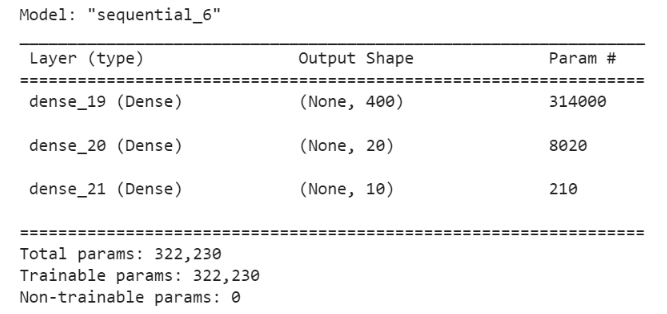

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">11. Training the CNN</h2>
    <p style = "font-size: 20px">With the architecture defined, it's time to train the Convolutional Neural Network (CNN) on the provided dataset. The training process involves feeding the training data to the network, adjusting the weights and biases based on the calculated loss, and iterating through the dataset for a specified number of epochs.</p>
    <p style = "font-size: 20px">We use the <code>fit</code> method to train the model, specifying parameters such as the training data, validation split, number of epochs, and batch size.</p>
</div>


In [26]:
# Training Model
model.fit(x_train, y_train, validation_split= 0.2, epochs=15, batch_size=64, verbose=1)
# model.evaluate(x_test, y_test, verbose=2)

Epoch 1/15
750/750 [==============================] - 8s 5ms/step - loss: 2.0124 - accuracy: 0.3541 - val_loss: 1.0298 - val_accuracy: 0.6811
Epoch 2/15
750/750 [==============================] - 4s 5ms/step - loss: 0.5877 - accuracy: 0.8126 - val_loss: 0.2711 - val_accuracy: 0.9159
Epoch 3/15
750/750 [==============================] - 3s 4ms/step - loss: 0.2461 - accuracy: 0.9231 - val_loss: 0.1960 - val_accuracy: 0.9367
Epoch 4/15
750/750 [==============================] - 5s 6ms/step - loss: 0.1625 - accuracy: 0.9496 - val_loss: 0.1314 - val_accuracy: 0.9600
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1258 - accuracy: 0.9613 - val_loss: 0.0971 - val_accuracy: 0.9711
Epoch 6/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1041 - accuracy: 0.9675 - val_loss: 0.1006 - val_accuracy: 0.9697
Epoch 7/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0901 - accuracy: 0.9716 - val_loss: 0.0906 - val_accuracy: 0.9728
Epoch 

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">12. Testing the Model</h2>
    <p style = "font-size: 20px">Now that the Convolutional Neural Network (CNN) has been trained, it's time to evaluate its performance on the test set. We predict probabilities for the test set using the trained model and then convert these probabilities into binary predictions based on a threshold (0.5 in this case).</p>
    <p style = "font-size: 20px">We calculate the test accuracy using the predicted and true labels and print the result.</p>
</div>


In [27]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.9826


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); margin-bottom: 20px;border-top: 2px solid #007bff">
    <h2 style="color: #007bff;border-bottom: 2px solid">13. Visualizing Predictions for Selected Samples</h2>
    <p style = "font-size: 20px">In this step, we define a mask to select a range of indices (20 to 49) from the test set. We then visualize the original images along with the predicted digits for the selected validation samples.</p>
</div>


In [28]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = x_test[20:40]
actual_labels = y_test[20:40]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 165ms/step


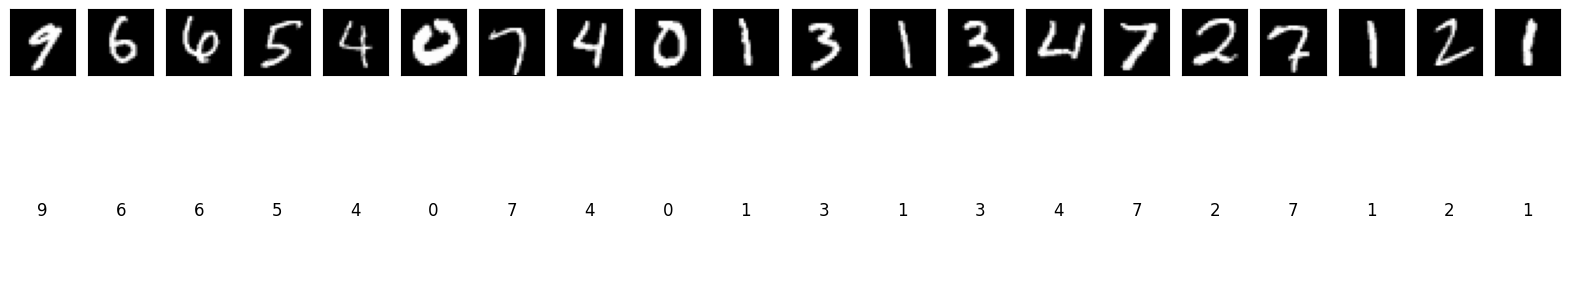

In [29]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            Thanks for viewing my work. If you like it, consider sharing it to others or give feedback to improve the notebook. Have a beautiful day my friend.
        </p>
    </div>

<center><img src='https://media4.giphy.com/media/M9gbBd9nbDrOTu1Mqx/giphy.gif?cid=790b7611704aa2ca4e403287801480a6c753abf45f3e6242&rid=giphy.gif&ct=s'
     height=30px width=160px /></center>